# Contour Detection

This is the process of detecting the boundry that separates the object from its background. It is applied on binary images as it gives a clear gradient,i.e, a clear separation from the background

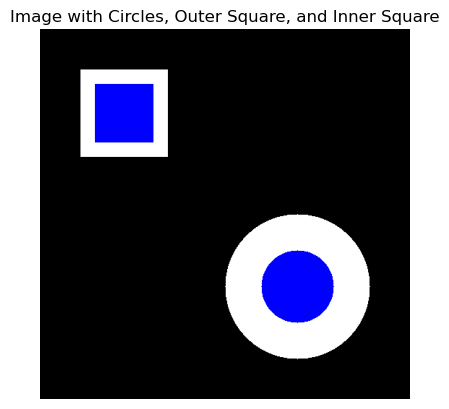

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Create a black background
image_size = 512
image = np.zeros((image_size, image_size, 3), dtype=np.uint8)

# Define the center of the circles
center_circle = (image_size // 2 + 100, image_size // 2 + 100)  # Adjusted position for the circles

# Define radii of the circles
radius1 = 100
radius2 = 50

# Create a mask for the region between the circles
mask = np.zeros((image_size, image_size), dtype=np.uint8)
cv2.circle(mask, center_circle, radius1, (255, 255, 255), thickness=-1)
cv2.circle(mask, center_circle, radius2, 0, thickness=-1)

# Fill the region between the circles with green color
image[mask == 255] = [0, 255, 0]

# Draw the circles on the black background
cv2.circle(image, center_circle, radius1, (255, 255, 255), thickness=-1)  # White circle with radius1
cv2.circle(image, center_circle, radius2, (0, 0, 255), thickness=-1)  # Red circle with radius2

# Define the parameters for the outer square
square_side = 120
square_top_left = (image_size // 2 - 200, image_size // 2 - 200)  # Adjusted position for the square
square_bottom_right = (square_top_left[0] + square_side, square_top_left[1] + square_side)

# Create a mask for the outer square
cv2.rectangle(image, square_top_left, square_bottom_right, (255, 255, 255), thickness=-1)

# Define the parameters for the inner square
inner_square_side = 80
inner_square_top_left = (square_top_left[0] + 20, square_top_left[1] + 20)  # Adjusted position for the inner square
inner_square_bottom_right = (inner_square_top_left[0] + inner_square_side, inner_square_top_left[1] + inner_square_side)

# Create a mask for the inner square
cv2.rectangle(image, inner_square_top_left, inner_square_bottom_right, (0, 0, 255), thickness=-1)

# Display the image with circles, outer square, and inner square
plt.imshow(image)
plt.title('Image with Circles, Outer Square, and Inner Square')
plt.axis('off')
plt.show()


2


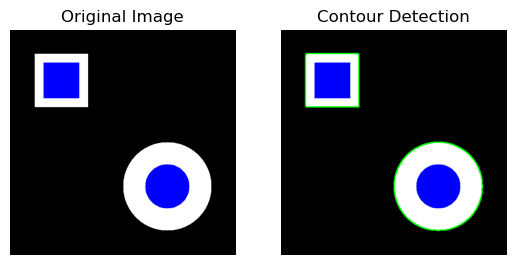

In [2]:
import cv2
import matplotlib.pyplot as plt

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and help contour detection
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Use Canny edge detector to find edges in the image
edges = cv2.Canny(blurred_image, 50, 150)

# Find contours in the image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

# Draw contours on a copy of the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Display the images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(contour_image)
plt.title('Contour Detection')
plt.axis('off')

plt.show()


### Contour Retrival Modes

cv2.RETR_EXTERNAL:
Retrieves only the extreme outer contours. It ignores contours inside the object.

cv2.RETR_LIST:
Retrieves all of the contours without establishing any hierarchical relationships.

cv2.RETR_CCOMP:
Retrieves all of the contours and organizes them into a two-level hierarchy. The top-level contours represent the external boundaries of the components, and the second-level contours represent the boundaries of the holes inside the components.

cv2.RETR_TREE:
Retrieves all of the contours and reconstructs a full hierarchy of nested contours. Each contour is represented as a linked list of contour structures.


8


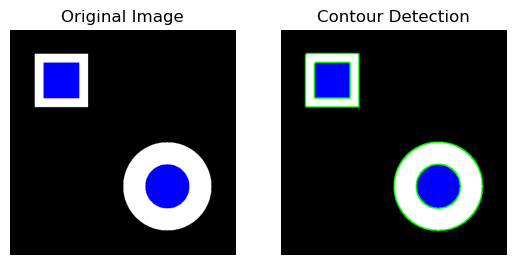

In [3]:
import cv2
import matplotlib.pyplot as plt

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and help contour detection
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Use Canny edge detector to find edges in the image
edges = cv2.Canny(blurred_image, 50, 150)

# Find contours in the image
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

# Draw contours on a copy of the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Display the images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(contour_image)
plt.title('Contour Detection')
plt.axis('off')

plt.show()


8
[[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [ 4  0  3 -1]
  [-1 -1 -1  2]
  [ 6  2  5 -1]
  [-1 -1 -1  4]
  [-1  4  7 -1]
  [-1 -1 -1  6]]]


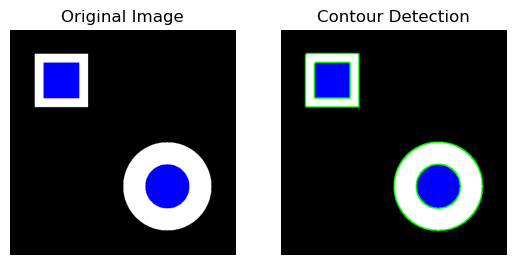

In [4]:
import cv2
import matplotlib.pyplot as plt

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and help contour detection
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Use Canny edge detector to find edges in the image
edges = cv2.Canny(blurred_image, 50, 150)

# Find contours in the image
contours, heirarchy = cv2.findContours(edges, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
# print(contours)
print(heirarchy)

# Draw contours on a copy of the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Display the images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(contour_image)
plt.title('Contour Detection')
plt.axis('off')

plt.show()


For each contour, the hierarchy information is represented as a four-element array [Next, Previous, First Child, Parent], where:

Next: Index of the next contour at the same hierarchical level. If there is no next contour, it is set to -1.

Previous: Index of the previous contour at the same hierarchical level. If there is no previous contour, it is set to -1.

First Child: Index of the first child contour. If there is no child contour, it is set to -1.

Parent: Index of the parent contour. If there is no parent contour, it is set to -1.

8
[[[ 4 -1  1 -1]
  [-1 -1  2  0]
  [-1 -1  3  1]
  [-1 -1 -1  2]
  [-1  0  5 -1]
  [-1 -1  6  4]
  [-1 -1  7  5]
  [-1 -1 -1  6]]]


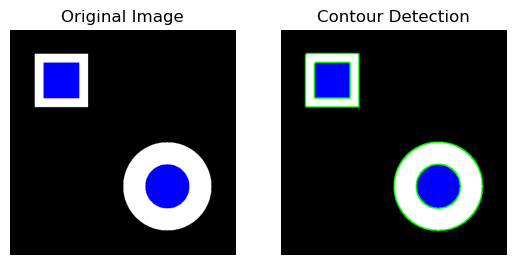

In [5]:
import cv2
import matplotlib.pyplot as plt

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and help contour detection
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Use Canny edge detector to find edges in the image
edges = cv2.Canny(blurred_image, 50, 150)

# Find contours in the image
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
# print(contours)
print(hierarchy)

# Draw contours on a copy of the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Display the images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(contour_image)
plt.title('Contour Detection')
plt.axis('off')

plt.show()


### Compress approximation methods

CHAIN_APPROX_NONE:
When None is specified as the contour approximation method, all the contour points are stored, and no approximation is performed.
The resulting contours will contain all the points along the contours.

cv2.CHAIN_APPROX_SIMPLE:
This method compresses horizontal, vertical, and diagonal segments and leaves only their end points. It represents contours using only the essential points.
It's a simple and efficient method for most cases, especially when you don't need a highly accurate representation of the contour.

cv2.CHAIN_APPROX_TC89_L1:
This method applies the Teh-Chin chain approximation algorithm with the L1 (Manhattan) distance criterion.
It is more advanced than cv2.CHAIN_APPROX_SIMPLE and may provide better results in some cases, especially when dealing with contours that have curves or angles.

#### Working:- 

Input:
The algorithm starts with a set of points that make up the contour.

Processing:
It iterates over the points and identifies straight line segments between consecutive points.
For each segment, it calculates the L1 distance (Manhattan distance) between the actual points and a line connecting them.

Approximation:
If the distance between a point in the contour and the line segment is below a certain threshold, the point is considered redundant and can be removed without significantly affecting the overall shape of the contour.
The algorithm proceeds to remove such redundant points, resulting in a simplified representation of the contour.

Output:
The output is a set of approximated contours with fewer points.


cv2.CHAIN_APPROX_TC89_KCOS:
The CHAIN_APPROX_TC89_KCOS method in OpenCV's cv2.findContours function employs the Teh-Chin chain approximation algorithm with the Kolmogorov-Crescenzi (K-cosine) distance criterion. This method is used to approximate contours by reducing the number of points needed to represent them while preserving their essential shape.

#### Working:

Input:
The algorithm starts with a set of points that make up the contour.

Processing:
It iterates over the points and identifies straight line segments between consecutive points.
For each segment, it calculates the K-cosine distance between the actual points and a line connecting them.

Approximation:
If the K-cosine distance between a point in the contour and the line segment is below a certain threshold, the point is considered redundant and can be removed without significantly affecting the overall shape of the contour.
The algorithm proceeds to remove such redundant points, resulting in a simplified representation of the contour.

Output:
The output is a set of approximated contours with fewer points.

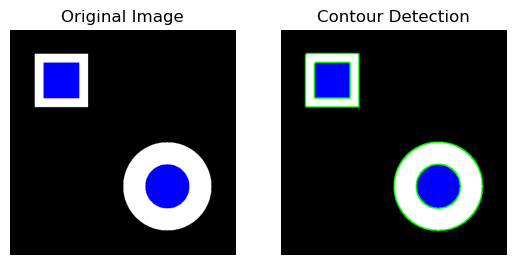

In [6]:
import cv2
import matplotlib.pyplot as plt

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and help contour detection
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Use Canny edge detector to find edges in the image
edges = cv2.Canny(blurred_image, 50, 150)

# Find contours in the image
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# print(len(contours))
# print(contours)
# print(hierarchy)

# Draw contours on a copy of the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Display the images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(contour_image)
plt.title('Contour Detection')
plt.axis('off')

plt.show()


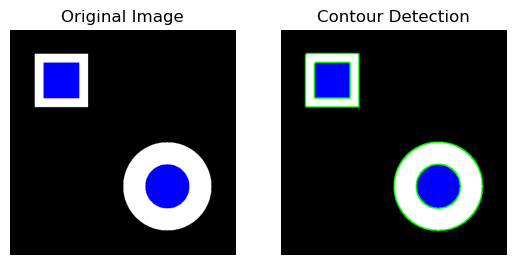

In [7]:
import cv2
import matplotlib.pyplot as plt

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and help contour detection
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Use Canny edge detector to find edges in the image
edges = cv2.Canny(blurred_image, 50, 150)

# Find contours in the image
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# print(len(contours))
# print(contours)
# print(hierarchy)

# Draw contours on a copy of the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Display the images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(contour_image)
plt.title('Contour Detection')
plt.axis('off')

plt.show()


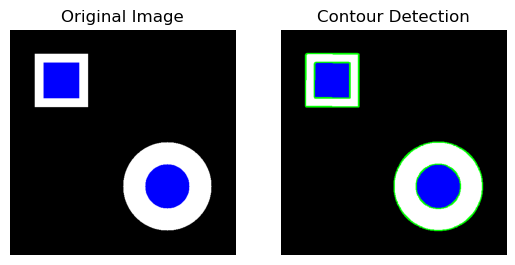

In [8]:
import cv2
import matplotlib.pyplot as plt

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and help contour detection
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Use Canny edge detector to find edges in the image
edges = cv2.Canny(blurred_image, 50, 150)

# Find contours in the image
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1)
# print(len(contours))
# print(contours)
# print(hierarchy)

# Draw contours on a copy of the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Display the images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(contour_image)
plt.title('Contour Detection')
plt.axis('off')

plt.show()

cv2.drawContours parameters :-



image: The input image where the contours will be drawn.

contours: A Python list of contours. Each contour is represented as a numpy array of (x, y) coordinates.

contourIdx: Parameter indicating the index of the contour to draw. If it is negative, all the contours are drawn.

color: Color of the contours. It can be a tuple (B, G, R) or a single scalar value if the image is grayscale.

thickness: Thickness of the contour lines.

#### Centroid detection

In [9]:
import cv2
import numpy as np

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and help contour detection
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Use Canny edge detector to find edges in the image
edges = cv2.Canny(blurred_image, 50, 150)

# Find contours in the image
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1)

# If contours are found
if contours:
    # Draw contours on the original image
    cv2.drawContours(image, contours, -1, (255, 255, 255), 2)

    # Iterate through all contours
    for contour in contours:
        # Calculate the moments of the contour
        moments = cv2.moments(contour)

        # Avoid division by zero (if the contour has no area)
        if moments['m00'] != 0:
            # Calculate centroid coordinates
            cx = int(moments['m10'] / moments['m00'])
            cy = int(moments['m01'] / moments['m00'])

            # Draw the centroid on the image
            cv2.circle(image, (cx, cy), 5, (0, 0, 0), -1)

    # Display the original image with contours and centroids
    cv2.imshow('Image with Contours and Centroids', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

else:
    print("No contours found in the image.")


QObject::moveToThread: Current thread (0x2c8c8c0) is not the object's thread (0x4c4d670).
Cannot move to target thread (0x2c8c8c0)

QObject::moveToThread: Current thread (0x2c8c8c0) is not the object's thread (0x4c4d670).
Cannot move to target thread (0x2c8c8c0)

QObject::moveToThread: Current thread (0x2c8c8c0) is not the object's thread (0x4c4d670).
Cannot move to target thread (0x2c8c8c0)

QObject::moveToThread: Current thread (0x2c8c8c0) is not the object's thread (0x4c4d670).
Cannot move to target thread (0x2c8c8c0)

QObject::moveToThread: Current thread (0x2c8c8c0) is not the object's thread (0x4c4d670).
Cannot move to target thread (0x2c8c8c0)

QObject::moveToThread: Current thread (0x2c8c8c0) is not the object's thread (0x4c4d670).
Cannot move to target thread (0x2c8c8c0)

QObject::moveToThread: Current thread (0x2c8c8c0) is not the object's thread (0x4c4d670).
Cannot move to target thread (0x2c8c8c0)

QObject::moveToThread: Current thread (0x2c8c8c0) is not the object's thread

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

(-0.5, 337.5, 449.5, -0.5)

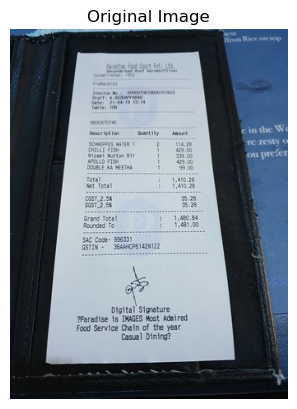

In [11]:
img = cv2.imread('/home/pratyush/Downloads/bill.jpg')

plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

(-0.5, 1499.5, 799.5, -0.5)

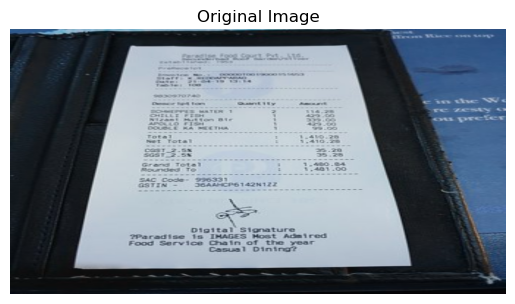

In [12]:
img = cv2.resize(img,(1500,800))

plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

#### Remove the noise

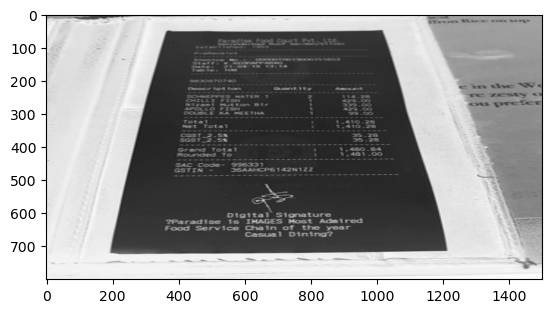

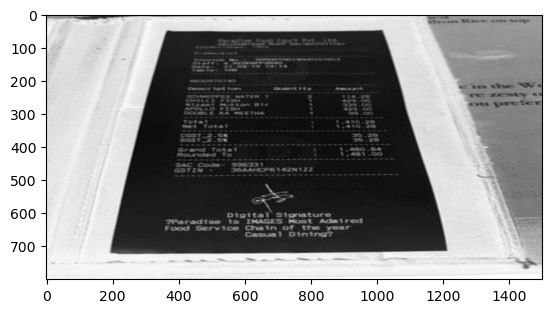

In [13]:
orig = img.copy()
gray = cv2.cvtColor(orig,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap = "binary")
plt.show()

blurred = cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(blurred,cmap = "binary")
plt.show()

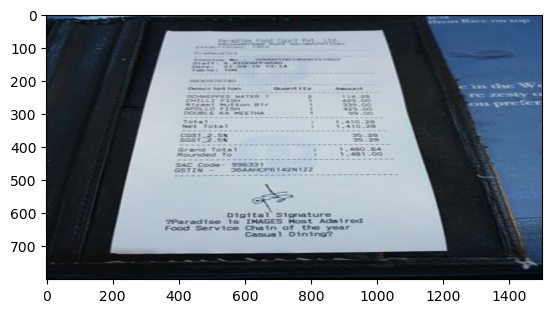

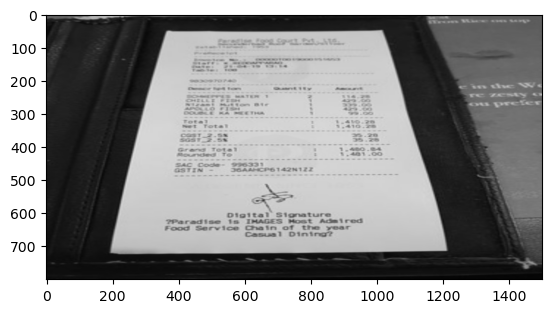

In [14]:
regen =  cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()

plt.imshow(regen)
plt.show()

#### Edge Detection  

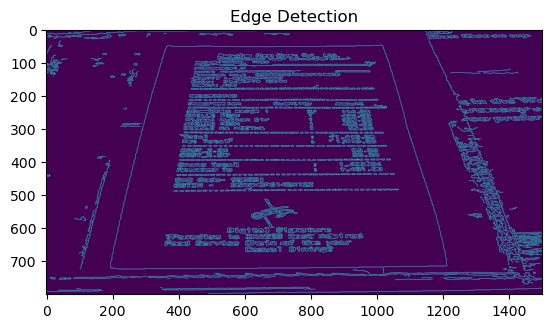

In [15]:
edge = cv2.Canny(blurred, 0,50)
orig_edge = edge.copy()

plt.imshow(orig_edge)
plt.title("Edge Detection")
plt.show()

#### Contour Detection

In [16]:
contours,_  =  cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))

2160


In [17]:
contours =  sorted(contours , reverse =  True , key = cv2.contourArea)

In [18]:
for c in contours:
    p = cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c,0.01*p,True)
    if len(approx) == 4:
        target = approx
        break
print(target.shape)

(4, 1, 2)


In [19]:
def reorder(h):
    h=h.reshape((4,2))
    print(h)
    
    hnew = np.zeros((4,2), dtype=np.float32)
    
    add = h.sum(axis =1)
    hnew[3] = h[np.argmax(add)]
    hnew[1] = h[np.argmax(add)]
    
    diff = np.diff(h, axis = 1)
    hnew[0] = h[np.argmax(diff)]
    hnew[2] = h[np.argmax(diff)]
    
    return hnew
    
reorder = reorder(target)
print(reorder)

[[833 107]
 [955 106]
 [958 109]
 [834 110]]
[[834. 110.]
 [958. 109.]
 [834. 110.]
 [958. 109.]]


In [20]:
edge.shape

(800, 1500)

In [21]:
input_representation  = reorder
output_map = np.float32([[0,0],[800,0],[800,800],[0,800]])

In [22]:
M = cv2.getPerspectiveTransform(input_representation,output_map)
ans = cv2.warpPerspective(orig,M,(800,800))

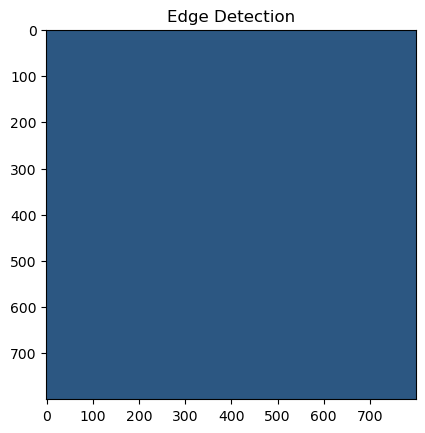

In [23]:
plt.imshow(ans)
plt.title("Edge Detection")
plt.show()

In [25]:
import cv2
import numpy as np

def mapp(h):
    h = h.reshape((4, 2))
    hnew = np.zeros((4, 2), dtype=np.float32)

    add = h.sum(1)
    hnew[0] = h[np.argmin(add)]
    hnew[2] = h[np.argmax(add)]

    diff = np.diff(h, axis=1)
    hnew[1] = h[np.argmin(diff)]
    hnew[3] = h[np.argmax(diff)]

    return hnew

image = cv2.imread('/home/pratyush/Downloads/test_img.jpg')
image = cv2.resize(image, (1300, 800))  # resizing because opencv does not work well with bigger images
orig = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # RGB To Gray Scale
cv2.imshow("Title", gray)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # (5,5) is the kernel size and 0 is sigma that determines the amount of blur
cv2.imshow("Blur", blurred)

edged = cv2.Canny(blurred, 30, 50)  # 30 MinThreshold and 50 is the MaxThreshold
cv2.imshow("Canny", edged)

contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)  # retrieve the contours as a list, with simple approximation model
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# the loop extracts the boundary contours of the page
for c in contours:
    p = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * p, True)

    if len(approx) == 4:
        target = approx
        break

approx = mapp(target)  # find endpoints of the sheet

pts = np.float32([[0, 0], [800, 0], [800, 800], [0, 800]])  # map to 800*800 target window

op = cv2.getPerspectiveTransform(approx, pts)  # get the top or bird eye view effect
dst = cv2.warpPerspective(orig, op, (800, 800))

cv2.imshow("Scanned", dst)
# press q or Esc to close
cv2.waitKey(0)
cv2.destroyAllWindows()


QObject::moveToThread: Current thread (0x2c8c8c0) is not the object's thread (0x4c4d670).
Cannot move to target thread (0x2c8c8c0)

QObject::moveToThread: Current thread (0x2c8c8c0) is not the object's thread (0x4c4d670).
Cannot move to target thread (0x2c8c8c0)

QObject::moveToThread: Current thread (0x2c8c8c0) is not the object's thread (0x4c4d670).
Cannot move to target thread (0x2c8c8c0)

QObject::moveToThread: Current thread (0x2c8c8c0) is not the object's thread (0x4c4d670).
Cannot move to target thread (0x2c8c8c0)

QObject::moveToThread: Current thread (0x2c8c8c0) is not the object's thread (0x4c4d670).
Cannot move to target thread (0x2c8c8c0)

QObject::moveToThread: Current thread (0x2c8c8c0) is not the object's thread (0x4c4d670).
Cannot move to target thread (0x2c8c8c0)

QObject::moveToThread: Current thread (0x2c8c8c0) is not the object's thread (0x4c4d670).
Cannot move to target thread (0x2c8c8c0)

QObject::moveToThread: Current thread (0x2c8c8c0) is not the object's thread